# Exercise 11.3 (programming) 
Apply one-step semi-gradient Q-learning to Baird’s coun-terexample 
and show empirically that its weights diverge.

[[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
  0.14285714]
 [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
  0.14285714]
 [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
  0.14285714]
 [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
  0.14285714]
 [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
  0.14285714]
 [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
  0.14285714]
 [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
  0.14285714]]


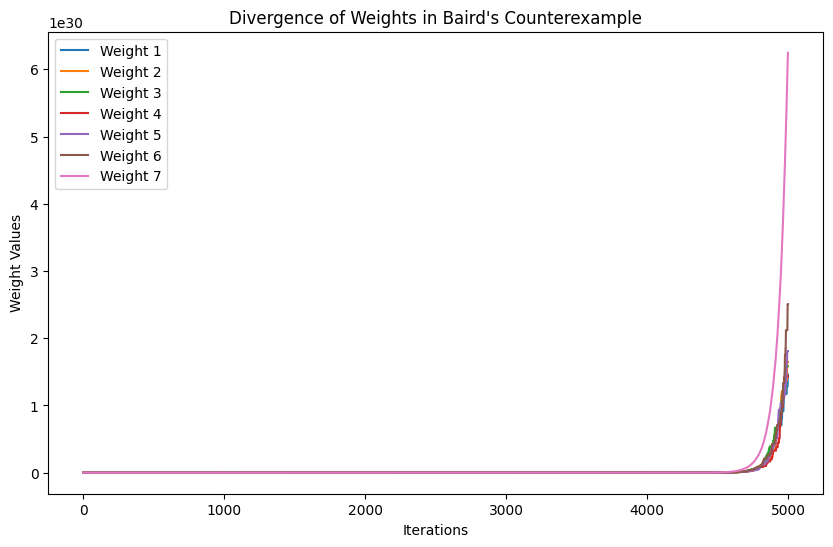

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define Baird's MDP
num_states = 7
num_features = 7
alpha = 0.01  # Learning rate
gamma = 0.99  # Discount factor
num_iterations = 5000  # Number of training steps

# Feature matrix for states (each row is a state feature vector)
X = np.array([
    [2, 0, 0, 0, 0, 0, 1],
    [0, 2, 0, 0, 0, 0, 1],
    [0, 0, 2, 0, 0, 0, 1],
    [0, 0, 0, 2, 0, 0, 1],
    [0, 0, 0, 0, 2, 0, 1],
    [0, 0, 0, 0, 0, 2, 1],
    [0, 0, 0, 0, 0, 0, 1]
], dtype=np.float32)

# Transition probabilities (deterministic)
P = np.zeros((num_states, num_states))
P[:, :] = 1.0 / 7.0

print(P)

# Initialize weights
weights = np.random.randn(num_features) * 0.1
weights_history = []

# Semi-Gradient Q-Learning update
for _ in range(num_iterations):
    state = np.random.choice(num_states)  # Sample a state
    next_state = np.random.choice(num_states, p=P[state])  # Sample transition
    
    # Compute Q-values (dot product with feature vector)
    Q_s = np.dot(X[state], weights)
    Q_next = np.dot(X[next_state], weights)
    
    # One-step semi-gradient Q-learning update
    target = Q_s + gamma * Q_next  # Bootstrap target
    td_error = target - Q_s  # TD error
    weights += alpha * td_error * X[state]  # Gradient update
    
    # Store weight history for visualization
    weights_history.append(weights.copy())

# Convert to numpy for easier plotting
weights_history = np.array(weights_history)

# Plot weight divergence
plt.figure(figsize=(10, 6))
for i in range(num_features):
    plt.plot(weights_history[:, i], label=f'Weight {i+1}')
plt.xlabel('Iterations')
plt.ylabel('Weight Values')
plt.title("Divergence of Weights in Baird's Counterexample")
plt.legend()
plt.show()
